In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator

In [2]:
%matplotlib notebook

In [3]:
# meta data
z = 0.0094
tb_max = 58863.34
t_fl = -17.4928

In [4]:
lc_df = pd.read_hdf('/Users/adamamiller/astronomy/ZTF/SN19yvq/data/P48/SN2019yvq/data/photometry/P48/forcephot_product/lightcurves/ZTF19adcecwu_force_phot_nob.h5')

In [5]:
marshal_df = pd.read_csv('../data/phot/Marshal.lc')
marshal_df.head(5)

,date,jdobs,filter,absmag,magpsf,sigmamagpsf,limmag,instrument,programid,reducedby,refsys,issub,isdiffpos
0,2019 Dec 06,2.458824e+06,g,99.0,99.0,99.0,18.14,P48+ZTF,1,None,None,True,True
1,2019 Dec 10,2.458828e+06,r,99.0,99.0,99.0,19.26,P48+ZTF,1,None,None,True,True
2,2019 Dec 11,2.458829e+06,r,99.0,99.0,99.0,19.70,P48+ZTF,1,None,None,True,True
3,2019 Dec 11,2.458829e+06,g,99.0,99.0,99.0,20.00,P48+ZTF,1,None,None,True,True
4,2019 Dec 13,2.458831e+06,r,99.0,99.0,99.0,19.80,P48+ZTF,1,None,None,True,True


In [6]:
SNT=5
Fratio = lc_df["Fratio"].values
Fratio_unc = lc_df["Fratio_unc"].values
ix = Fratio > SNT*Fratio_unc


mags = -2.5 * np.log10(Fratio[ix])
emags = 2.5 / np.log(10) * Fratio_unc[ix] / Fratio[ix]
filt_id = lc_df.filterid.values

ulims = -2.5*np.log10(5*Fratio_unc[~ix])

<IPython.core.display.Javascript object>


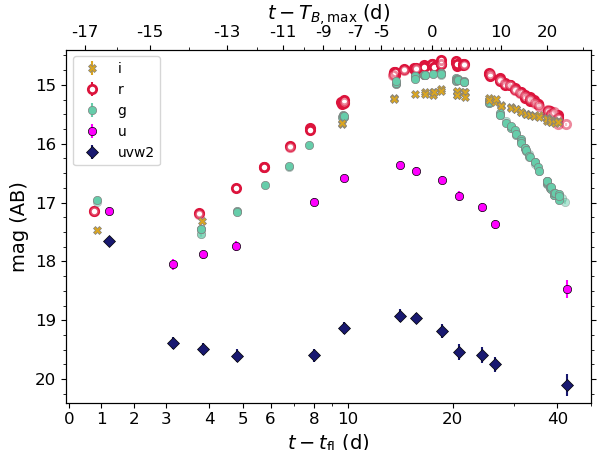

In [25]:
color_dict = {1: 'MediumAquaMarine',
              2: 'Crimson', 
              3: 'Goldenrod'}

mark_color_dict = {2: 'white',
                   1: 'MediumAquaMarine',
                   3: 'Goldenrod'}
sym_dict = {1: 'o',
            2: 'o',
            3: 'X'}
mec_dict = {2: 'Crimson',
            1: '0.5',
            3: '0.5'}
mew_dict = {2: 2,
            1: 0.5,
            3: 0.5}
filt_dict = {1:'g', 2:'r', 3:'i'}
zorder_dict = {3: 10,
               1: 5,
               2: 2}


fig, ax = plt.subplots(figsize=(6,4.5))

for filt in [3,2,1]:
    mag_filt = np.where(filt_id[ix] == filt)
    ax.errorbar((lc_df.jdobs.iloc[ix].values[mag_filt] - 2400000.5 - tb_max)/(1+z) - t_fl, 
                mags[mag_filt], emags[mag_filt], 
                fmt = sym_dict[filt], color=mark_color_dict[filt], ecolor=color_dict[filt],
                mec=mec_dict[filt], mew=mew_dict[filt],
                label = filt_dict[filt], zorder = zorder_dict[filt])

    # Marshal LC
    this_lc = np.where((marshal_df['filter'] == filt_dict[filt]) & 
                       (marshal_df['instrument'] == 'P48+ZTF') &
                       (marshal_df['sigmamagpsf'] < 99))
    ax.errorbar((marshal_df.iloc[this_lc].jdobs.values - 2400000.5 - tb_max)/(1+z) - t_fl, 
            marshal_df.iloc[this_lc].magpsf.values, marshal_df.iloc[this_lc].sigmamagpsf.values, 
            fmt = sym_dict[filt], color=mark_color_dict[filt], ecolor=color_dict[filt],
            mec=mec_dict[filt], mew=mew_dict[filt],
            alpha=0.5)

    
    ulim_filt = np.where(filt_id[~ix] == filt)
    ULoffset = 0.25
    yerr = np.zeros((2, len(ulim_filt[0])))
    yerr[0,:] += ULoffset
    ax.errorbar((lc_df.jdobs.iloc[~ix].values[ulim_filt] - 2400000.5 - tb_max)/(1+z) - t_fl, 
                ulims[ulim_filt]+ULoffset, yerr = yerr, 
                fmt = 'v', color = color_dict[filt], ms = 5, 
                elinewidth=2, capsize = 0, mec = 'k', mew = 0.5)
    ax.plot((lc_df.jdobs.iloc[~ix].values[ulim_filt] - 2400000.5 - tb_max)/(1+z) - t_fl, 
            ulims[ulim_filt], '_', 
            color = color_dict[filt], mew = 2, ms = 5)
    
    
    
#     ax.errorbar((lc_df.jdobs.iloc[~ix].values[ulim_filt] - 2400000.5 - tb_max)/(1+z), 
#                 ulims[ulim_filt],
#                 fmt = sym_dict[filt], color=mark_color_dict[filt], ecolor=color_dict[filt],
#                 mec=mec_dict[filt], mew=mew_dict[filt])
    

# UVOT phot
this_lc = np.where((marshal_df['filter'] == 'u') & 
                   (marshal_df['instrument'] == 'Swift+UVOT') &
                   (marshal_df['sigmamagpsf'] < 99))
ax.errorbar((marshal_df.iloc[this_lc].jdobs.values - 2400000.5 - tb_max)/(1+z) - t_fl, 
        marshal_df.iloc[this_lc].magpsf.values, marshal_df.iloc[this_lc].sigmamagpsf.values, 
        fmt = 'o', color='magenta', ecolor='magenta',
        mec='k', mew=0.5,
           label='u')

this_lc = np.where((marshal_df['filter'] == 'UVW2') & 
                   (marshal_df['instrument'] == 'Swift+UVOT') &
                   (marshal_df['sigmamagpsf'] < 99))
ax.errorbar((marshal_df.iloc[this_lc].jdobs.values - 2400000.5 - tb_max)/(1+z) - t_fl, 
        marshal_df.iloc[this_lc].magpsf.values, marshal_df.iloc[this_lc].sigmamagpsf.values, 
        fmt = 'D', color='#191970', ecolor='#191970',
        mec='k', mew=0.5,
           label='uvw2')

    
ax.set_ylim(20.4,14.4)
ax.set_ylabel(r'mag (AB)', fontsize=14)
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.set_xlim(-0.1,50)
ax.set_xlabel(r'$t - t_\mathrm{fl}$ (d)', fontsize=14)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xscale("symlog", linthreshx=3, linscalex = 0.25, subsx = [2,3,4,5,6,7,8,9])
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 8, 10, 20, 40])
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 8, 10, 20, 40])
ax.tick_params(which='both', right=True, labelsize=12)

ax.legend(fancybox=True)

# set up time relative to T_Bmax
ax2 = ax.twiny()
ax2.set_xlabel(r"$t - T_{B,\mathrm{max}} \; (\mathrm{d})$", fontsize = 14)
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale("symlog", linthreshx=3, linscalex = 0.25, subsx = [2,3,4,5,6,7,8,9])

bmax_ticks = [-17, -15, -13, -11, -9, -7, -5, 0, 10, 20]
ax2.set_xticks(np.array(bmax_ticks) - t_fl)
ax2.set_xticklabels(bmax_ticks, fontsize = 12)
ax2.xaxis.set_minor_locator(FixedLocator(np.append(np.linspace(-20, 10, 31), np.linspace(20, 100, 9)) - t_fl))

fig.subplots_adjust(left=0.11, bottom=0.105,top=0.89,right=0.985)
fig.savefig('../paper/figures/P48_lc.pdf')

In [27]:
abs_mag_df = pd.DataFrame((lc_df.jdobs.iloc[ix].values - 2400000.5 - tb_max)/(1+z) - t_fl, columns=['t_restframe'])
a_lambda = np.zeros_like(mags)
for fid, alam in zip([1,2,3], [0.18, 0.13, 0.09]):
    a_lambda[np.where(lc_df["filterid"].values[ix] == fid)] = alam

abs_mag_df['abs_mag'] = mags - 33.14 - a_lambda
abs_mag_df['mag_unc'] = emags
abs_mag_df['filt'] = lc_df['filter'][ix].values

abs_mag_df.to_csv('abs_mag_p48.csv', index=False)
abs_mag_df.head(5)

,t_restframe,abs_mag,mag_unc,filt
0,0.779844,-16.127753,0.015658,b'r'
1,0.847793,-15.763070,0.014474,b'i'
2,0.867332,-16.356836,0.010132,b'g'
3,3.731084,-16.089966,0.017258,b'r'
4,3.789436,-15.866692,0.015882,b'g'


## Make nice plot of color evolution

In [12]:
# From Bulla, Miller+2020

gr_population = pd.read_csv('../data/comp_sne/colors/gr_adam_late.txt', delim_whitespace=True)
gr_population.head(5)

normal_ia = np.where((gr_population.type == 'normal*') |
                     (gr_population.type == 'normal') | 
                     (gr_population.type == '91T-like') |
                     (gr_population.type == '99aa-like'))


In [13]:
gr_jd = np.array([])
gr = np.array([])
gr_unc = np.array([])

ri_jd = np.array([])
ri = np.array([])
ri_unc = np.array([])


new_night = np.where(np.diff(lc_df.jdobs.iloc[ix].values) > 0.5)[0]
new_night = np.append(new_night, new_night[-1])
for night_num, night_idx in enumerate(new_night):
    if night_num == 0:
        start_tonight = 0
        end_tonight = night_idx+1
    elif night_num == len(new_night)-1:
        start_tonight = new_night[night_num-1]+1
        end_tonight = len(lc_df.jdobs.iloc[ix].values)
    else:
        start_tonight = new_night[night_num-1]+1
        end_tonight = night_idx+1

    tonight = np.arange(sum(ix))[start_tonight:end_tonight]
    snr_tonight = Fratio[ix][tonight]/Fratio_unc[ix][tonight]
    jd_tonight = np.average(lc_df.jdobs.iloc[ix].values[tonight], 
                            weights=snr_tonight**2)
    if 1 in filt_id[ix][tonight] and 2 in filt_id[ix][tonight]:
        g_tonight = np.where(filt_id[ix][tonight] == 1)
        r_tonight = np.where(filt_id[ix][tonight] == 2)
        gr_jd = np.append(gr_jd, jd_tonight)
        
        w_mean_g = np.average(Fratio[ix][tonight][g_tonight], 
                              weights = 1/Fratio_unc[ix][tonight][g_tonight]**2)
        w_mean_g_unc = np.sum(1/Fratio_unc[ix][tonight][g_tonight]**2)**(-0.5)

        w_mean_r = np.average(Fratio[ix][tonight][r_tonight], 
                              weights = 1/Fratio_unc[ix][tonight][r_tonight]**2)
        w_mean_r_unc = np.sum(1/Fratio_unc[ix][tonight][r_tonight]**2)**(-0.5)        
        
        gr = np.append(gr, -2.5*np.log10(w_mean_g/w_mean_r))
        gr_unc = np.append(gr_unc, 2.5 / np.log(10) * np.hypot(w_mean_g_unc/w_mean_g, 
                                                               w_mean_r_unc/w_mean_r))

    if 2 in filt_id[ix][tonight] and 3 in filt_id[ix][tonight]:
        r_tonight = np.where(filt_id[ix][tonight] == 2)
        i_tonight = np.where(filt_id[ix][tonight] == 3)
        ri_jd = np.append(ri_jd, jd_tonight)
        
        w_mean_r = np.average(Fratio[ix][tonight][r_tonight], 
                              weights = 1/Fratio_unc[ix][tonight][r_tonight]**2)
        w_mean_r_unc = np.sum(1/Fratio_unc[ix][tonight][r_tonight]**2)**(-0.5)

        w_mean_i = np.average(Fratio[ix][tonight][i_tonight], 
                              weights = 1/Fratio_unc[ix][tonight][i_tonight]**2)
        w_mean_i_unc = np.sum(1/Fratio_unc[ix][tonight][i_tonight]**2)**(-0.5)        
        
        ri = np.append(ri, -2.5*np.log10(w_mean_r/w_mean_i))
        ri_unc = np.append(ri_unc, 2.5 / np.log(10) * np.hypot(w_mean_r_unc/w_mean_r, 
                                                               w_mean_i_unc/w_mean_i))

In [14]:
bv_jd = np.array([])
bv = np.array([])
bv_unc = np.array([])

ub_jd = np.array([])
ub = np.array([])
ub_unc = np.array([])

uvm2u_jd = np.array([])
uvm2u = np.array([])
uvm2u_unc = np.array([])

new_night = np.where(np.diff(marshal_df.jdobs.values) > 0.5)[0]
new_night = np.append(new_night, new_night[-1])
for night_num, night_idx in enumerate(new_night):
    if night_num == 0:
        start_tonight = 0
        end_tonight = night_idx+1
    elif night_num == len(new_night)-1:
        start_tonight = new_night[night_num-1]+1
        end_tonight = len(lc_df.jdobs.iloc[ix].values)
    else:
        start_tonight = new_night[night_num-1]+1
        end_tonight = night_idx+1

    tonight = np.arange(len(marshal_df))[start_tonight:end_tonight]
    if 'B' in marshal_df['filter'].iloc[tonight].values and 'V' in marshal_df['filter'].iloc[tonight].values:
        filts_tonight = marshal_df['filter'].iloc[tonight]
        jd_tonight = marshal_df['jdobs'].iloc[tonight].values
        mag_tonight = marshal_df['magpsf'].iloc[tonight].values
        mag_unc_tonight = marshal_df['sigmamagpsf'].iloc[tonight].values
        b_tonight = np.where(filts_tonight == 'B')
        v_tonight = np.where(filts_tonight == 'V')

        
        bv_jd = np.append(bv_jd, 
                          np.mean(jd_tonight[np.where((filts_tonight == 'B') |
                                                      (filts_tonight == 'V'))]))
        bv = np.append(bv, 
                       mag_tonight[b_tonight] -  mag_tonight[v_tonight])
        bv_unc = np.append(bv_unc, 
                           np.hypot(mag_unc_tonight[b_tonight],mag_unc_tonight[v_tonight]))
        
    if 'u' in marshal_df['filter'].iloc[tonight].values and 'UVM2' in marshal_df['filter'].iloc[tonight].values:
        filts_tonight = marshal_df['filter'].iloc[tonight]
        jd_tonight = marshal_df['jdobs'].iloc[tonight].values
        mag_tonight = marshal_df['magpsf'].iloc[tonight].values
        mag_unc_tonight = marshal_df['sigmamagpsf'].iloc[tonight].values
        uvm2_tonight = np.where(filts_tonight == 'UVM2')
        u_tonight = np.where(filts_tonight == 'u')

        
        uvm2u_jd = np.append(uvm2u_jd, 
                          np.mean(jd_tonight[np.where((filts_tonight == 'UVM2') |
                                                      (filts_tonight == 'u'))]))
        uvm2u = np.append(uvm2u, 
                          mag_tonight[uvm2_tonight] -  mag_tonight[u_tonight])
        uvm2u_unc = np.append(uvm2u_unc, 
                              np.hypot(mag_unc_tonight[uvm2_tonight],mag_unc_tonight[u_tonight]))
    
    if 'u' in marshal_df['filter'].iloc[tonight].values and 'B' in marshal_df['filter'].iloc[tonight].values:
        filts_tonight = marshal_df['filter'].iloc[tonight]
        jd_tonight = marshal_df['jdobs'].iloc[tonight].values
        mag_tonight = marshal_df['magpsf'].iloc[tonight].values
        mag_unc_tonight = marshal_df['sigmamagpsf'].iloc[tonight].values
        b_tonight = np.where(filts_tonight == 'B')
        u_tonight = np.where(filts_tonight == 'u')

        
        ub_jd = np.append(ub_jd, 
                          np.mean(jd_tonight[np.where((filts_tonight == 'B') |
                                                      (filts_tonight == 'u'))]))
        ub = np.append(ub, 
                          mag_tonight[u_tonight] -  mag_tonight[b_tonight])
        ub_unc = np.append(ub_unc, 
                              np.hypot(mag_unc_tonight[u_tonight],mag_unc_tonight[b_tonight]))

<IPython.core.display.Javascript object>


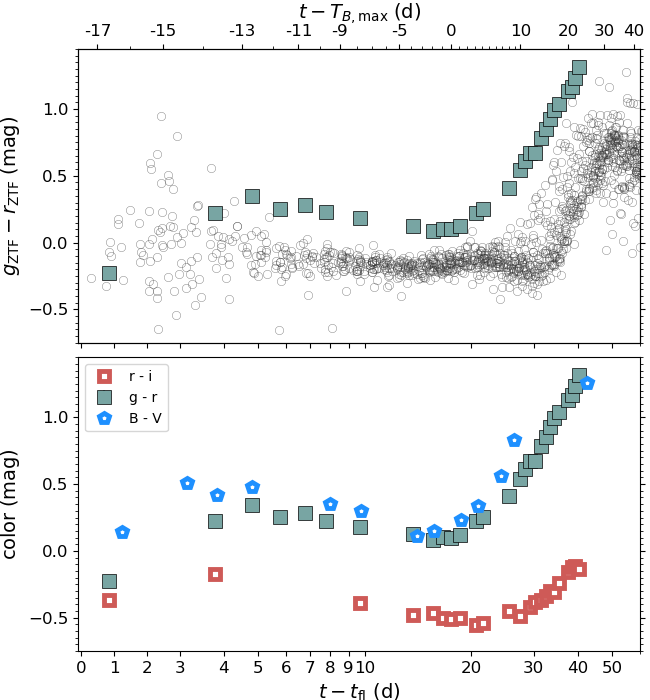

In [26]:
aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}


fig, (ax, ax1) = plt.subplots(2,1, 
                              sharex=True, 
                              figsize=(6.5,7))

ax.plot(gr_population.iloc[normal_ia].t.values, 
        gr_population.iloc[normal_ia].gr.values,
        'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)

    
ax1.errorbar((ri_jd - 2400000.5 - tb_max)/(1+z) - t_fl, 
            ri - 0.04, ri_unc, label='r - i',
            fmt='s', color='white',
            mec = aam_colors['punch'], ms=7, mew=3.5)

for ap in [ax, ax1]:
    ap.errorbar((gr_jd - 2400000.5 - tb_max)/(1+z) - t_fl, 
                gr - 0.05, gr_unc, label='g - r',
                fmt='s', color=aam_colors['ocean'] , ms=10, mec='k', mew=0.5)
    ap.tick_params(which='both', right=True, labelsize=12)

ax1.errorbar((bv_jd - 2400000.5 - tb_max)/(1+z) - t_fl, 
             bv - 0.05, bv_unc, label='B - V',
            fmt='p', color='white',
            mec = 'DodgerBlue', ms=7, mew=3.5)
# ax1.errorbar((uvm2u_jd - 2400000.5 - tb_max)/(1+z) - t_fl, 
#              uvm2u, uvm2u_unc, label='UVM2 - U',
#             fmt='H', color='white',
#             mec = 'MediumVioletRed', ms=7, mew=3.5)
# ax1.errorbar((ub_jd - 2400000.5 - tb_max)/(1+z) - t_fl, 
#              ub, ub_unc, label='U - B',
#              fmt='H', color='white',
#              mec = 'MediumVioletRed', ms=7, mew=3.5)


ax.set_ylim(-0.75,1.45)
ax.set_xlim((-0.1,60))
ax.set_ylabel(r'$g_\mathrm{ZTF} - r_\mathrm{ZTF} \;(\mathrm{mag})$', fontsize=14)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_xscale("symlog", linthreshx=3, linscalex = 0.25, subsx = [2,3,4,5,6,7,8,9])
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50])
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50])

ax1.set_ylim(-0.75,1.45)
ax1.set_xlabel(r'$t - t_\mathrm{fl}$ (d)', fontsize=14)
ax1.set_ylabel(r'$\mathrm{color} \;(\mathrm{mag})$', fontsize=14)
# ax1.set_ylim(-0.7,2.9)
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
ax1.legend(fancybox=True)


# set up time relative to T_Bmax
ax2 = ax.twiny()
ax2.set_xlabel(r"$t - T_{B,\mathrm{max}} \; (\mathrm{d})$", fontsize = 14)
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale("symlog", linthreshx=3, linscalex = 0.25, subsx = [2,3,4,5,6,7,8,9])

bmax_ticks = [-17, -15, -13, -11, -9, -5, 0, 10, 20, 30, 40]
ax2.set_xticks(np.array(bmax_ticks) - t_fl)
ax2.set_xticklabels(bmax_ticks, fontsize = 12)
ax2.xaxis.set_minor_locator(FixedLocator(np.append(np.linspace(-20, 10, 31), np.linspace(20, 100, 9)) - t_fl))

fig.subplots_adjust(left=0.12, bottom=0.07,top=0.93,right=0.985,hspace=0.05)
fig.align_ylabels()
fig.savefig('../paper/figures/P48_colors.pdf')